In [2]:
#!pip install --pre deepchem

import deepchem as dc
dc.__version__

No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (/home/rakshit/anaconda3/envs/cc/lib/python3.10/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (/home/rakshit/anaconda3/envs/cc/lib/python3.10/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
Skipped 

Error: Unable to import pysam. Please make sure it is installed.
Error: Unable to import pysam. Please make sure it is installed.
Error: Unable to import pysam. Please make sure it is installed.
Error: Unable to import pysam. Please make sure it is installed.


'2.7.2.dev'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from deepchem.data import NumpyDataset
from deepchem.models.torch_models import CNN

In [4]:
bbbc2_dataset = dc.molnet.load_bbbc002(splitter='random')
tasks, dataset, transforms = bbbc2_dataset
train, val, test = dataset

train_x, train_y, train_w, train_ids = train.X, train.y, train.w, train.ids
val_x, val_y, val_w, val_ids = val.X, val.y, val.w, val.ids
test_x, test_y, test_w, test_ids = test.X, test.y, test.w, test.ids

In [5]:
print(f"Shape of train data: {train_x.shape}")
print(f"Shape of train labels: {train_y.shape}")

Shape of train data: (40, 512, 512)
Shape of train labels: (40,)


In [6]:
train_x[0].shape

(512, 512)

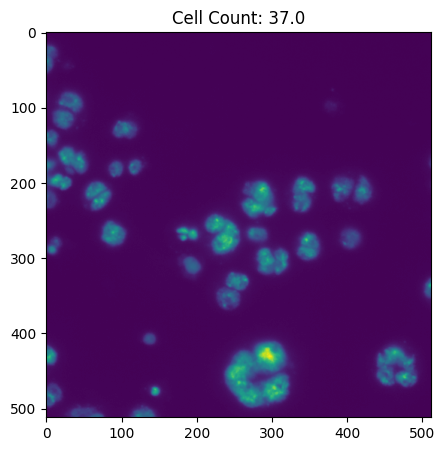

In [20]:
i = 20

plt.figure(figsize=(5, 5))
plt.imshow(train_x[i])
plt.title(f"Cell Count: {train_y[i]}")
plt.savefig('./demo.png')
plt.show()

In [8]:
train_x = np.array(train_x.reshape(-1, 512, 512, 1), dtype=np.float32)
train_y = np.array(train_y.reshape(-1), dtype=np.float32)

val_x = np.array(val_x.reshape(-1, 512, 512, 1), dtype=np.float32)
val_y = np.array(val_y.reshape(-1), dtype=np.float32)

test_x = np.array(test_x.reshape(-1, 512, 512, 1), dtype=np.float32)
test_y = np.array(test_y.reshape(-1), dtype=np.float32)

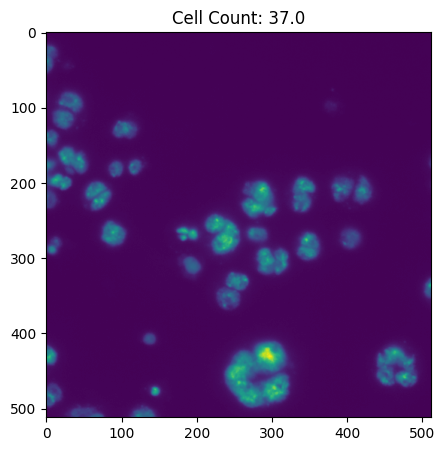

In [9]:
i = 20

plt.figure(figsize=(5, 5))
plt.imshow(train_x[i])
plt.title(f"Cell Count: {train_y[i]}")
plt.show()

In [10]:
train_data = NumpyDataset(train_x, train_y)
val_data = NumpyDataset(val_x, val_y)
test_data = NumpyDataset(test_x, test_y)

In [11]:
regression_metric = dc.metrics.Metric(dc.metrics.rms_score)

model_dir = './model'   

In [12]:
model = CNN(n_tasks=1, n_features=1, dims=2, layer_filters = [32, 64, 128, 128, 64, 32], kernel_size=3, learning_rate=5e-4,
            mode='regression', padding='same', batch_size=4, residual=True, dropouts=0.1, pool_type='average', model_dir=model_dir)

callback = dc.models.ValidationCallback(val_data, 10, [regression_metric])

avg_loss = model.fit(train_data, nb_epoch=20, callbacks=callback)

/home/rakshit/anaconda3/envs/cc/lib/python3.10/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Step 10 validation: rms_score=64.173
Step 20 validation: rms_score=55.0034
Step 30 validation: rms_score=55.4072
Step 40 validation: rms_score=49.3707
Step 50 validation: rms_score=49.0514
Step 60 validation: rms_score=48.4368
Step 70 validation: rms_score=44.5686
Step 80 validation: rms_score=42.9838
Step 90 validation: rms_score=40.1855
Step 100 validation: rms_score=48.053
Step 110 validation: rms_score=44.3647
Step 120 validation: rms_score=36.3767
Step 130 validation: rms_score=35.6963
Step 140 validation: rms_score=37.6352
Step 150 validation: rms_score=33.5596
Step 160 validation: rms_score=32.6716
Step 170 validation: rms_score=33.7986
Step 180 validation: rms_score=30.3944
Step 190 validation: rms_score=31.2284
Step 200 validation: rms_score=31.353


Train loss:  29.35
Val Loss:  18.6
Test Loss:  24.8


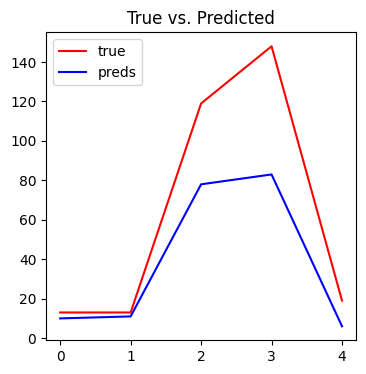

In [13]:
test_metric = dc.metrics.Metric(dc.metrics.mean_absolute_error)

preds = np.array(model.predict(train_data), dtype=np.uint32)
print("Train loss: ", test_metric.compute_metric(train_y, preds))

preds = np.array(model.predict(val_data), dtype=np.uint32)
print("Val Loss: ", test_metric.compute_metric(val_y, preds))

preds = np.array(model.predict(test_data), dtype=np.uint32)
print("Test Loss: ", test_metric.compute_metric(test_y, preds))

plt.figure(figsize=(4, 4))
plt.title("True vs. Predicted")
plt.plot(test_y, color='red', label='true')
plt.plot(preds, color='blue', label='preds')
plt.legend()
plt.show()

In [14]:
print(f"Mean of True Values: {np.mean(test_y):.2f}")
print(f"Mean of Predictions: {np.mean(preds):.2f}")

diff = []
for i in range(len(test_y)):
  diff.append(abs(test_y[i] - preds[i]))

print(f"Max of Difference: {np.max(diff)}")

Mean of True Values: 62.40
Mean of Predictions: 37.60
Max of Difference: 65.0


In [15]:
restored_model = CNN(n_tasks=1, n_features=1, dims=2, layer_filters = [32, 64, 128, 128, 64, 32], kernel_size=3, learning_rate=5e-4,
            mode='regression', padding='same', batch_size=4, residual=True, dropouts=0.1, pool_type='average', model_dir='./model_cell_counting')

restored_model.restore()

/home/rakshit/anaconda3/envs/cc/lib/python3.10/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [16]:
test_metric = dc.metrics.Metric(dc.metrics.mean_absolute_error)

preds = np.array(restored_model.predict(train_data), dtype=np.uint32)
print("Train loss: ", test_metric.compute_metric(train_y, preds))

Train loss:  25.85


In [17]:
train_data

<NumpyDataset X.shape: (40, 512, 512, 1), y.shape: (40,), w.shape: (40,), ids: [0 1 2 ... 37 38 39], task_names: [0]>